In [52]:
from MLP import *
import torch
import numpy as np
import torch.nn as nn

torch.set_default_dtype(torch.float64)

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)


inputs = []
n = 32

train_num = 10000
train_id = np.random.choice(2**n, train_num)
#for i in range(2**n):
for i in train_id:
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (n - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float64)
#label3 = np.sum(inputs[:,[4,5,6,7]], axis=1)[:,None] % 2
label3 = np.sum(inputs[:,[0,1,2,3]], axis=1)[:,None] % 2
label2 = np.sum(inputs[:,[0,1]], axis=1)[:,None] % 2
label1 = np.sum(inputs[:,[2,3]], axis=1)[:,None] % 2
#label2 = np.sum(inputs[:,np.arange(4,)], axis=1)[:,None] % 2
#label1 = np.sum(inputs[:,np.arange(4,)], axis=1)[:,None] % 2
labels = np.concatenate([label1, label2, label3], axis=1)

inputs = torch.tensor(inputs)
labels = torch.tensor(labels)

num = inputs.shape[0]
ratio = 0.8
train_num = int(num*ratio)
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))

dataset = {}
dataset['train_input'] = inputs[train_id]
dataset['test_input'] = inputs[test_id]
dataset['train_label'] = labels[train_id]
dataset['test_label'] = labels[test_id]

width = [n, 50, 3]
model = MLP(width=width, seed=seed)
depth = len(width) - 1

def train_acc1():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,0])

def train_acc2():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,1])

def train_acc3():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,2])


results = model.fit(dataset, lamb=0e-4, opt='Adam', lr=1e-3, batch=-1, steps=1000, metrics=[train_acc1, train_acc2, train_acc3], display_metrics=['train_loss', 'train_acc1', 'train_acc2', 'train_acc3'], save_ckpt=False);

 train_loss: 5.23e-01 | train_acc1: 5.10e-01 | train_acc2: 5.09e-01 | train_acc3: 5.03e-01 |:   2%| 

using full batch


 train_loss: 2.64e-02 | train_acc1: 1.00e+00 | train_acc2: 1.00e+00 | train_acc3: 1.00e+00 |: 100%|█


(0.0, 1000.0)

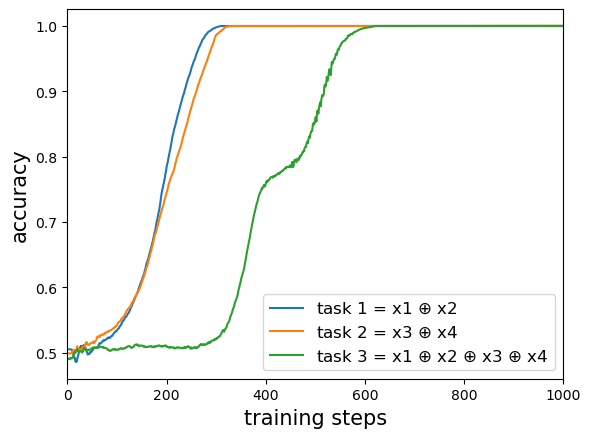

In [53]:
import matplotlib.pyplot as plt
plt.plot(results['train_acc1'])
plt.plot(results['train_acc2'])
plt.plot(results['train_acc3'])
plt.xlabel('training steps', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4', r'task 3 = x1 $\oplus$ x2 $\oplus$ x3 $\oplus$ x4'], fontsize=12, loc='lower right')
plt.xlim(0,1000)

In [54]:
import numpy as np

np.savez('./results/sp_mech_2', **results)

In [1]:
from MLP import *
import torch
import numpy as np
import torch.nn as nn

torch.set_default_dtype(torch.float64)

seed = 4
torch.manual_seed(seed)
np.random.seed(seed)


inputs = []
n = 32

train_num = 10000
train_id = np.random.choice(2**n, train_num)
#for i in range(2**n):
for i in train_id:
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (n - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float64)
label2 = np.sum(inputs[:,[2,3]], axis=1)[:,None] % 2
label1 = np.sum(inputs[:,[0,1]], axis=1)[:,None] % 2
labels = np.concatenate([label1, label2], axis=1)

sparsity = 0.1
mask_num = int(train_num*(1-sparsity))

inputs = torch.tensor(inputs)
labels = torch.tensor(labels)

mask = torch.ones(train_num, 2)
mask[:mask_num, 1] *= 0. 

num = inputs.shape[0]
ratio = 1.0
train_num = int(num*ratio)
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))

dataset = {}
dataset['train_input'] = inputs[train_id]
dataset['test_input'] = inputs[train_id]
dataset['train_label'] = labels[train_id]
dataset['test_label'] = labels[train_id]

width = [n, 50, 2]
model = MLP(width=width, seed=seed)
depth = len(width) - 1

def train_acc1():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,0])

def train_acc2():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,1])

def train_acc3():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,2])


results = model.fit(dataset, lamb=0e-4, opt='Adam', lr=1e-3, batch=-1, steps=1000, mask=mask, metrics=[train_acc1, train_acc2], display_metrics=['train_loss', 'train_acc1', 'train_acc2'], save_ckpt=False);

 train_loss: 3.76e-01 | train_acc1: 5.15e-01 | train_acc2: 5.04e-01 |:   1%| | 14/1000 [00:00<00:07,

using full batch


 train_loss: 6.95e-03 | train_acc1: 1.00e+00 | train_acc2: 1.00e+00 |: 100%|█| 1000/1000 [00:06<00:0


(0.0, 1000.0)

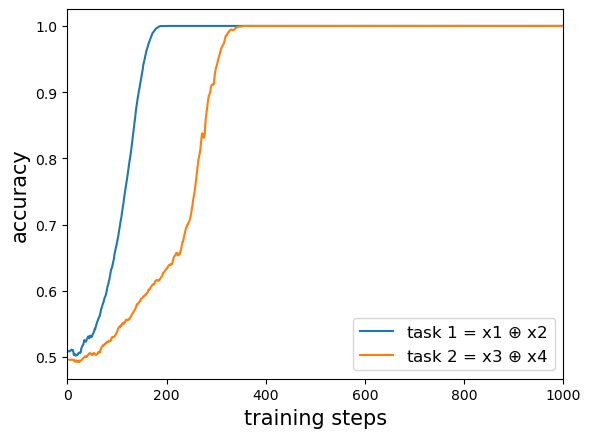

In [2]:
import matplotlib.pyplot as plt
plt.plot(results['train_acc1'])
plt.plot(results['train_acc2'])
plt.xlabel('training steps', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4'], fontsize=12, loc='lower right')
plt.xlim(0,1000)

Text(0.5, 1.0, 'betas=(0.0,0.0)')

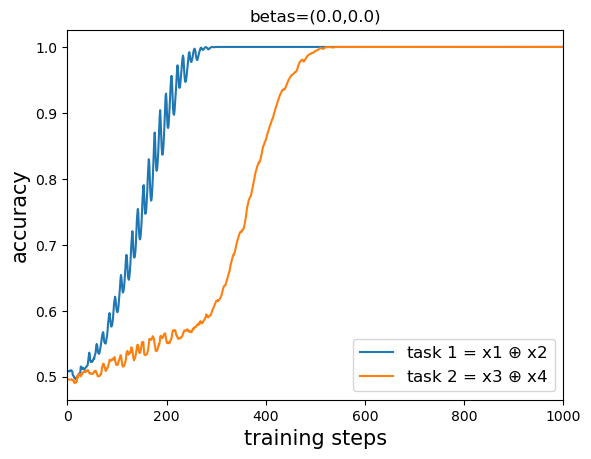

In [2]:
import matplotlib.pyplot as plt
plt.plot(results['train_acc1'])
plt.plot(results['train_acc2'])
plt.xlabel('training steps', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4'], fontsize=12, loc='lower right')
plt.xlim(0,1000)
plt.title('betas=(0.0,0.0)')

In [31]:
import numpy as np

np.savez('./results/sp_mech_1', **results)

In [19]:
loaded_data = np.load('./results/sp_mech_1.npz')
loaded_dict = dict(loaded_data)

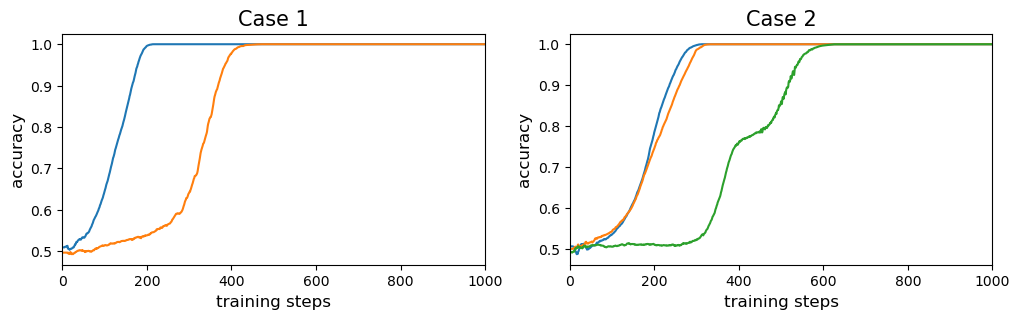

In [2]:
# plot 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
data = np.load('./results/sp_mech_1.npz')
mydict = dict(data)
acc1 = mydict['train_acc1']
acc2 = mydict['train_acc2']
plt.plot(acc1)
plt.plot(acc2)
#plt.arrow(200,0.99,0,-0.42,head_length=0.03, head_width=20, color='black', alpha=0.5)
plt.xlabel('training steps', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
#plt.legend([r'task 1 = x1 $\oplus$ x2 (frequent)', r'task 2 = x3 $\oplus$ x4 (rare)'], fontsize=12, loc='lower right')
plt.title('Case 1', fontsize=15)
plt.xlim(0,1000)

plt.subplot(1,2,2)
data = np.load('./results/sp_mech_2.npz')
mydict = dict(data)
acc1 = mydict['train_acc1']
acc2 = mydict['train_acc2']
acc3 = mydict['train_acc3']
plt.plot(acc1)
plt.plot(acc2)
plt.plot(acc3)
#plt.arrow(300,0.99,0,-0.42,head_length=0.03, head_width=20, color='black', alpha=0.5)
plt.xlabel('training steps', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
#plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4', r'task 3 = x1 $\oplus$ x2 $\oplus$ x3 $\oplus$ x4'], fontsize=10, loc='lower right')
plt.title('Case 2', fontsize=15)
plt.xlim(0,1000)

plt.savefig('./plot/sp_two_mechs.pdf', bbox_inches='tight')

In [32]:
import copy

n_task = 3
prob = [1/3, 1/3, 1/3]
l = np.ones(n_task,)
learning_rate = 1e-2
dim = 7 * 50 / 600

lr = learning_rate * np.sqrt(dim)
n_steps2 = 1000

ls = []



for i in range(n_steps2):
    
    c = np.ones(3,)
    alpha = 0.01
    c[2] = ((1-l[0]**(alpha)) * (1-l[1]**(alpha)))
    fg = c * prob * l
    fg_norm = fg/(np.sum(fg) + 0.01)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

(0.0, 1000.0)

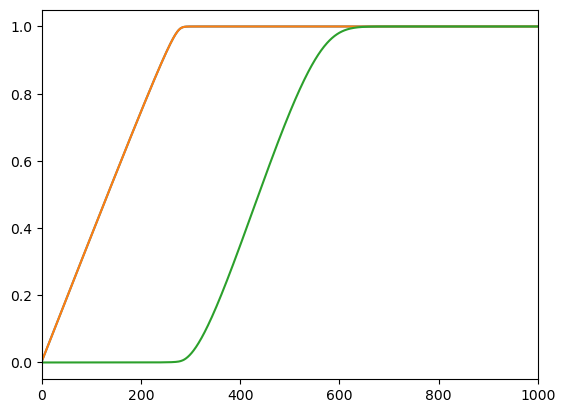

In [33]:
for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,1000)

In [34]:
np.savez('./results/sp_eff_2', 1-ls)

In [38]:
dict(np.load('./results/sp_eff_2.npz'))

{'arr_0': array([[3.76237742e-03, 3.76237742e-03, 0.00000000e+00],
        [7.52454486e-03, 7.52454486e-03, 5.36559686e-12],
        [1.12865008e-02, 1.12865008e-02, 2.69877454e-11],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])}

In [3]:
from MLP import *
import torch
import numpy as np
import torch.nn as nn

torch.set_default_dtype(torch.float64)

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)


inputs = []
n = 32

train_num = 10000
train_id = np.random.choice(2**n, train_num)
#for i in range(2**n):
for i in train_id:
    string = "{0:b}".format(i)
    sample = [int(string[i]) for i in range(len(string))]
    sample = (n - len(sample)) * [0] + sample
    inputs.append(sample)
   
inputs = np.array(inputs).astype(np.float64)
#label3 = np.sum(inputs[:,[4,5,6,7]], axis=1)[:,None] % 2
label3 = np.sum(inputs[:,[4,5,6,7]], axis=1)[:,None] % 2
label2 = np.sum(inputs[:,[0,1]], axis=1)[:,None] % 2
label1 = np.sum(inputs[:,[2,3]], axis=1)[:,None] % 2
#label2 = np.sum(inputs[:,np.arange(4,)], axis=1)[:,None] % 2
#label1 = np.sum(inputs[:,np.arange(4,)], axis=1)[:,None] % 2
labels = np.concatenate([label1, label2, label3], axis=1)

inputs = torch.tensor(inputs)
labels = torch.tensor(labels)

num = inputs.shape[0]
ratio = 0.8
train_num = int(num*ratio)
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))

dataset = {}
dataset['train_input'] = inputs[train_id]
dataset['test_input'] = inputs[test_id]
dataset['train_label'] = labels[train_id]
dataset['test_label'] = labels[test_id]

width = [n, 50, 3]
model = MLP(width=width, seed=seed)
depth = len(width) - 1

def train_acc1():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,0])

def train_acc2():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,1])

def train_acc3():
    return torch.mean(((model(dataset['train_input']) > 0.5) == dataset['train_label']).float()[:,2])


results = model.fit(dataset, lamb=0e-4, opt='Adam', lr=1e-3, batch=-1, steps=3000, metrics=[train_acc1, train_acc2, train_acc3], display_metrics=['train_loss', 'train_acc1', 'train_acc2', 'train_acc3'], save_ckpt=False);

 train_loss: 5.24e-01 | train_acc1: 5.08e-01 | train_acc2: 5.05e-01 | train_acc3: 5.04e-01 |:   0%| 

using full batch


 train_loss: 7.79e-02 | train_acc1: 1.00e+00 | train_acc2: 1.00e+00 | train_acc3: 1.00e+00 |: 100%|█


(0.0, 3000.0)

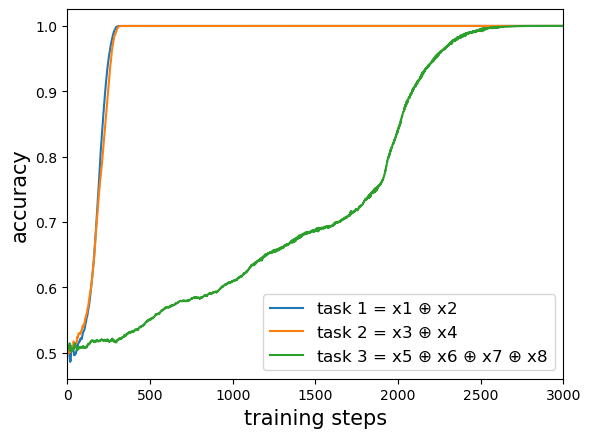

In [6]:
import matplotlib.pyplot as plt
plt.plot(results['train_acc1'])
plt.plot(results['train_acc2'])
plt.plot(results['train_acc3'])
plt.xlabel('training steps', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4', r'task 3 = x5 $\oplus$ x6 $\oplus$ x7 $\oplus$ x8'], fontsize=12, loc='lower right')
plt.xlim(0,3000)

In [7]:
import numpy as np

np.savez('./results/sp_mech_3', **results)

In [154]:
import copy

n_task = 3
prob = [1/3, 1/3, 1/3]
l = np.ones(n_task,)
learning_rate = 1e-2
dim = 7 * 50 / 400

lr = learning_rate * np.sqrt(dim)
n_steps2 = 3000

ls = []



for i in range(n_steps2):
    
    prob[2] = (l[2] <= 0.5) * 0.08 + (l[2] > 0.5) * 0.0045
    fg = prob * l
    fg_norm = fg/(np.sum(fg) + 0.1)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

(0.0, 3000.0)

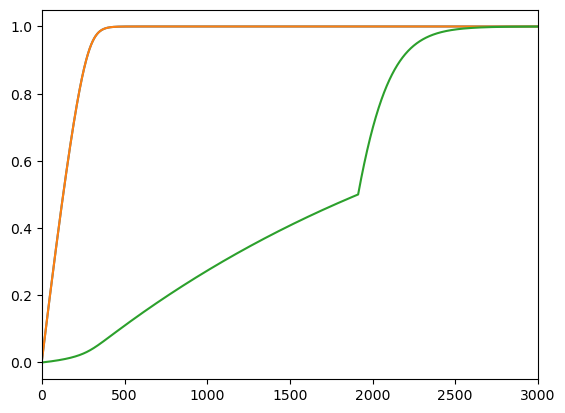

In [155]:
for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,3000)

In [156]:
np.savez('./results/sp_eff_3', 1-ls)

In [2]:
import copy
import numpy as np

n_task = 3
prob = [1/3, 1/3, 1/3]
l = np.ones(n_task,)
learning_rate = 1e-2
dim = 7 * 50 / 400

lr = learning_rate * np.sqrt(dim)
n_steps2 = 3000

ls = []



for i in range(n_steps2):
    
    prob[2] = (l[2] <= 0.5) * 0.0045 + (l[2] > 0.5) * 0.0045
    fg = prob * l
    fg_norm = fg/(np.sum(fg) + 0.1)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

(0.0, 3000.0)

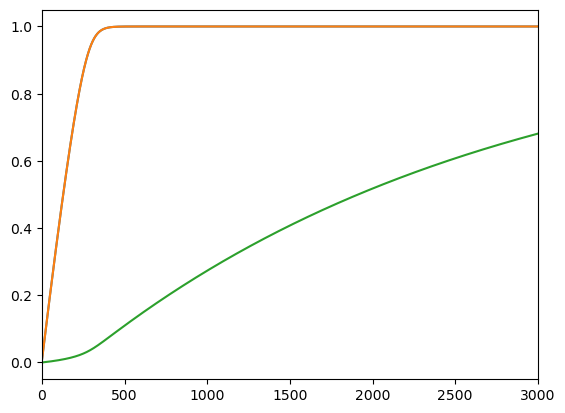

In [5]:
import matplotlib.pyplot as plt

for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,3000)

In [6]:
np.savez('./results/sp_eff_3_fixp3', 1-ls)

In [13]:
relevant_e

{'arr_0': array([[3.76237742e-03, 3.76237742e-03, 0.00000000e+00],
        [7.52454486e-03, 7.52454486e-03, 5.36559686e-12],
        [1.12865008e-02, 1.12865008e-02, 2.69877454e-11],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])}

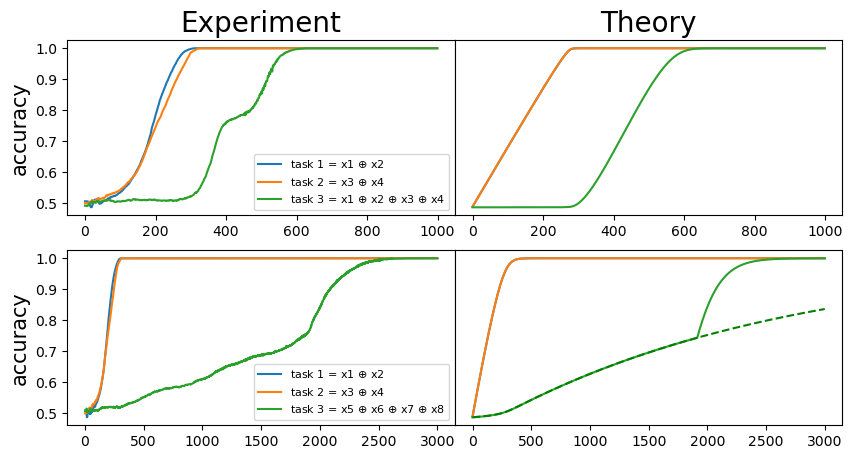

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)

relevant_m = dict(np.load('./results/sp_mech_2.npz'))

plt.plot(relevant_m['train_acc1'])
plt.plot(relevant_m['train_acc2'])
plt.plot(relevant_m['train_acc3'])

plt.ylabel('accuracy', fontsize=15)
plt.title('Experiment', fontsize=20)

plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4', r'task 3 = x1 $\oplus$ x2 $\oplus$ x3 $\oplus$ x4'], fontsize=8, loc='lower right')

plt.subplot(2,2,2)

relevant_e = dict(np.load('./results/sp_eff_2.npz'))['arr_0']

plt.plot(relevant_e[:,0])
plt.plot(relevant_e[:,1])
plt.plot(relevant_e[:,2])

plt.yticks([])

plt.title('Theory', fontsize=20)

plt.subplot(2,2,3)

relevant_m = dict(np.load('./results/sp_mech_3.npz'))

plt.plot(relevant_m['train_acc1'])
plt.plot(relevant_m['train_acc2'])
plt.plot(relevant_m['train_acc3'])

plt.ylabel('accuracy', fontsize=15)

plt.legend([r'task 1 = x1 $\oplus$ x2', r'task 2 = x3 $\oplus$ x4', r'task 3 = x5 $\oplus$ x6 $\oplus$ x7 $\oplus$ x8'], fontsize=8, loc='lower right')

plt.subplot(2,2,4)

relevant_e = dict(np.load('./results/sp_eff_3.npz'))['arr_0']

plt.plot(relevant_e[:,0])
plt.plot(relevant_e[:,1])
plt.plot(relevant_e[:,2])

relevant_e = dict(np.load('./results/sp_eff_3_fixp3.npz'))['arr_0']
plt.plot(relevant_e[:,2], color='green', ls='--')

plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.savefig('./plot/sp_eff_exp_compare.pdf', bbox_inches='tight')